## Predicción de precios de casas con el método general de la Ciencia de Datos

### 1. EDA (Exploratory Data Analysis)

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score, mean_absolute_error
import pickle

In [7]:
df = pd.read_csv('real-estate.csv')

In [15]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#### 1.1. Características numéricas

In [10]:
df.dtypes[df.dtypes!='object']

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

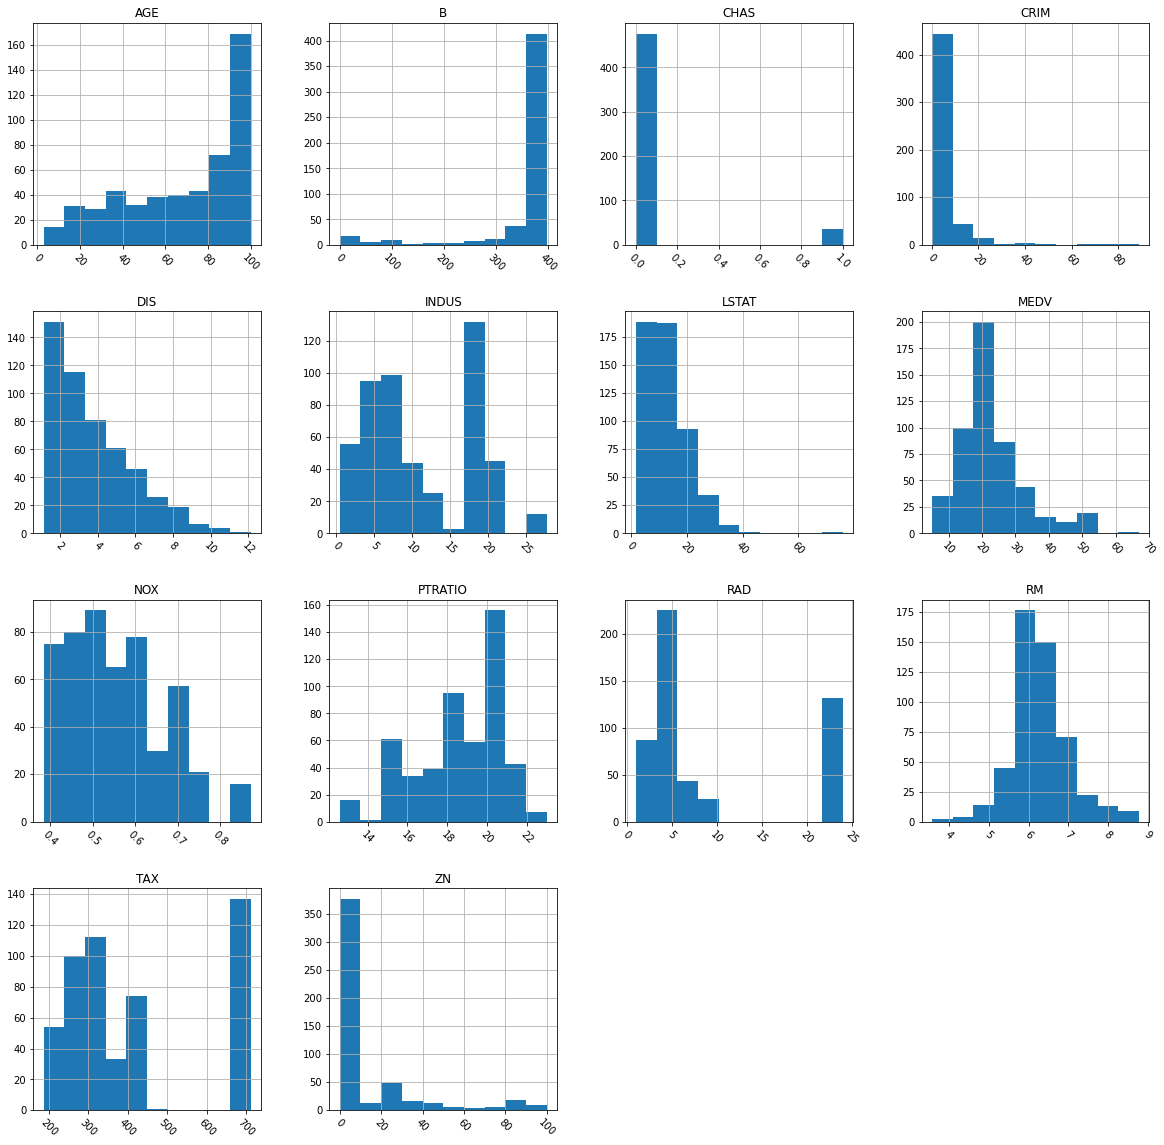

In [14]:
df.hist(figsize = (20,20), xrot=-45)
plt.show()

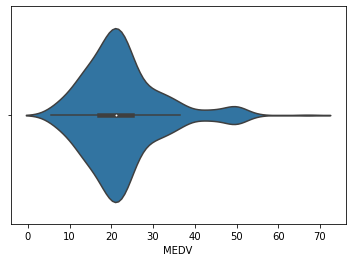

In [35]:
sns.violinplot(data = df, x = 'MEDV')
# distribución de la variable objetivo en 
# gráfico de violín
plt.show()

In [19]:
df.MEDV.median()

21.2

In [20]:
df.select_dtypes(exclude = ['object']).isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [27]:
df.RM.fillna(0, inplace = True) #reemplazar NaN por 0

In [31]:
df.LSTAT.sort_values(ascending = False)
# De las distribuciones se ve que aparentemente
# no hay outliers

509    76.00
510    45.00
374    37.97
414    36.98
373    34.77
       ...  
192     2.87
232     2.47
40      1.98
162     1.92
161     1.73
Name: LSTAT, Length: 511, dtype: float64

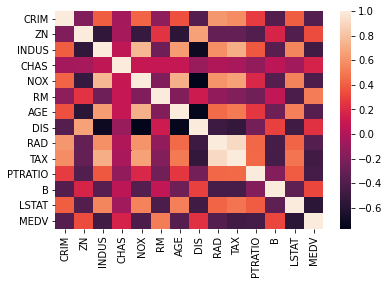

In [32]:
sns.heatmap(df.corr()); #mapa de correlación

#### 1.2. Características Categóricas
No hay variables categóricas, pero es importante saber que se le debería dar un valor numérico para poder tratarlo. Un método es one-hot encoding, donde se crea una columna por cada valor categórico y se le asigna 1 o 0 si es que existe en cada fila.

In [33]:
df.dtypes[df.dtypes=='object'] #no hay xdd

Series([], dtype: object)

#### 1.3. Segmentation (NO SE HARÁ PORQUE NO HAY VARIABLES CATEGÓRICAS UU)

### 2. Feature Engineering
Depende de las observaciones que podamos tener sobre la data y nuestra expertise sobre el tema. Crear nuevas características que puedan resumir o mejorar las que ya tenemos. Por ahora no.

### 3. Modelamiento
Usaremos estos 3 modelos de regresión:
1. Regresión Lineal Regularizada (Ridge (L2), Lasso (L1), Elastic Net(combinación lineal de L1 y L2)
2. Random Forests
3. Gradient-Boosted trees

In [37]:
y = df.MEDV
X = df.drop('MEDV', axis = 1)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
#random state sirve para tener siempre el mismo resultado aleatorio

In [86]:
pipelines = {
    'lasso' : make_pipeline(StandardScaler(),
              Lasso(random_state = 42)),
    'ridge' : make_pipeline(StandardScaler(),
              Ridge(random_state = 42)),
    'enet'  : make_pipeline(StandardScaler(),
              ElasticNet(random_state = 42)),
    'rf'    : make_pipeline(
              RandomForestRegressor(random_state = 42)),
    'gb'    : make_pipeline(
              GradientBoostingRegressor(random_state = 42))
}
#pipeline sirve para hacer loop sobre los diferentes
#métodos mientras a la vez se tunea los hiperparámetros 
#con GridSearchCV

### IMPORTANTE:
Los nombres (str) no son inventados, son palabras clave

In [103]:
lasso_hyperparameters = {
    'lasso__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5,
                    1, 5, 10]}
ridge_hyperparameters = {
    'ridge__alpha': [0.001, 0.005, 0.01, 0.1, 0.5,
                   1, 5, 10]}
enet_hyperparameters = {
    'elasticnet__alpha' : [0.001, 0.005, 0.01, 0.1, 0.5,
                   1, 5, 10],
    'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]}

In [114]:
rf_hyperparameters = {
     'randomforestregressor__n_estimators' : [100, 200],
     'randomforestregressor__max_features' : ['auto', 'sqrt', 0.33],
     'randomforestregressor__min_samples_leaf' : [1, 3, 5, 10]}

In [115]:
gb_hyperparameters = {
    'gradientboostingregressor__n_estimators' : [100, 200],
    'gradientboostingregressor__learning_rate' : [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth' : [1, 3, 5]}


In [116]:
hyperparameters = {
    'lasso' : lasso_hyperparameters,
    'ridge' : ridge_hyperparameters,
    'enet'  : enet_hyperparameters,
    'rf'    : rf_hyperparameters,
    'gb'    : gb_hyperparameters
}

In [117]:
fitted_models = {}
for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, 
                         hyperparameters[name], 
                         cv=10, 
                         n_jobs=-1)
    model.fit(X_train, y_train)
    fitted_models[name] = model
    #se crea un diccionario de modelos
    #gridsearch retorna el modelo con los 
    #mejores hiperparámetros

### 4. Evaluation

#### 4.1. Performance scores (cross_validation)

In [120]:
for name, model in fitted_models.items():
    print(name, model.best_score_)

lasso 0.6122025610069746
ridge 0.6146207616943651
enet 0.6133005604250008
rf 0.838825360845593
gb 0.8530440395925354


Para el test data, se usará el R2 y el MAE (mean absolute error)

In [122]:
for name, model in fitted_models.items():
    pred = model.predict(X_test)
    print(name)
    print(' - - - - ')
    print('R²:', r2_score(y_test, pred))
    print('MAE:', mean_absolute_error(y_test, pred))
    print()
    

lasso
 - - - - 
R²: -0.028516265112775052
MAE: 4.420084572332874

ridge
 - - - - 
R²: -0.011578890416955812
MAE: 4.41129784804925

enet
 - - - - 
R²: -0.023042078497777174
MAE: 4.415371151333103

rf
 - - - - 
R²: 0.6938888796260302
MAE: 2.696131067961164

gb
 - - - - 
R²: 0.7005278317949105
MAE: 2.7544106485854742



### 5. Deployment

In [127]:
with open('final_model.pkl', 'wb') as f:
    pickle.dump(fitted_models['rf'].best_estimator_, f)